In [24]:
import os
import os.path as op
import boto3
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import skimage.io
import skimage.filters
import skimage.morphology
from skimage.filters import try_all_threshold
#from diff_classifier import aws
import matplotlib.image as mpimg
from scipy import ndimage as ndi
from skimage.transform import resize
from skimage import measure

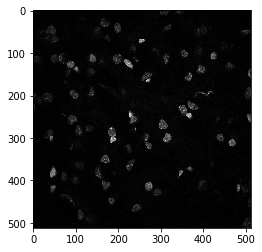

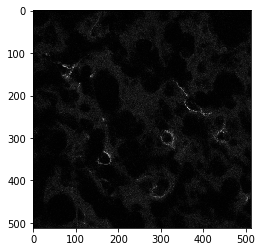

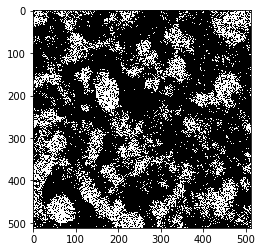

In [30]:
img = skimage.io.imread('slide_9_slice_2_60x_z_stack_2.tif')
img.shape
imgplot = plt.imshow(1-img[15, :, :], cmap='Greys')
plt.show()
imgplot = plt.imshow(1-img[16, :, :], cmap='Greys')
plt.show()
imgplot = plt.imshow(1-img[17, :, :], cmap='Greys')
plt.show()

In [31]:
DAPI = img[0::3]
PNN = img[1::3]
PVA = img[2::3]

In [32]:
DAPI_Max = np.max(DAPI,axis=0)
PNN_Max = np.max(PNN,axis=0)
PVA_Max = np.max(PVA,axis=0)

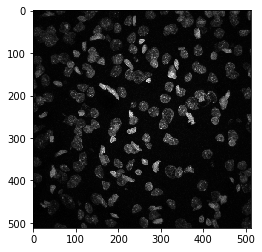

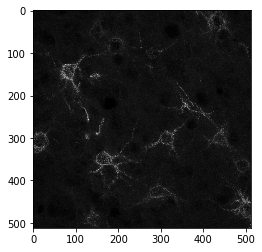

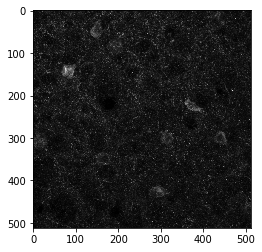

In [33]:
DAPIplot = plt.imshow(1-DAPI_Max, cmap='Greys')
plt.show()
PNNplot = plt.imshow(1-PNN_Max, cmap='Greys')
plt.show()
PVAplot = plt.imshow(1-PVA_Max, cmap='Greys')
plt.show()

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 1440x1296 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c25fe1cd0>,
       dtype=object))

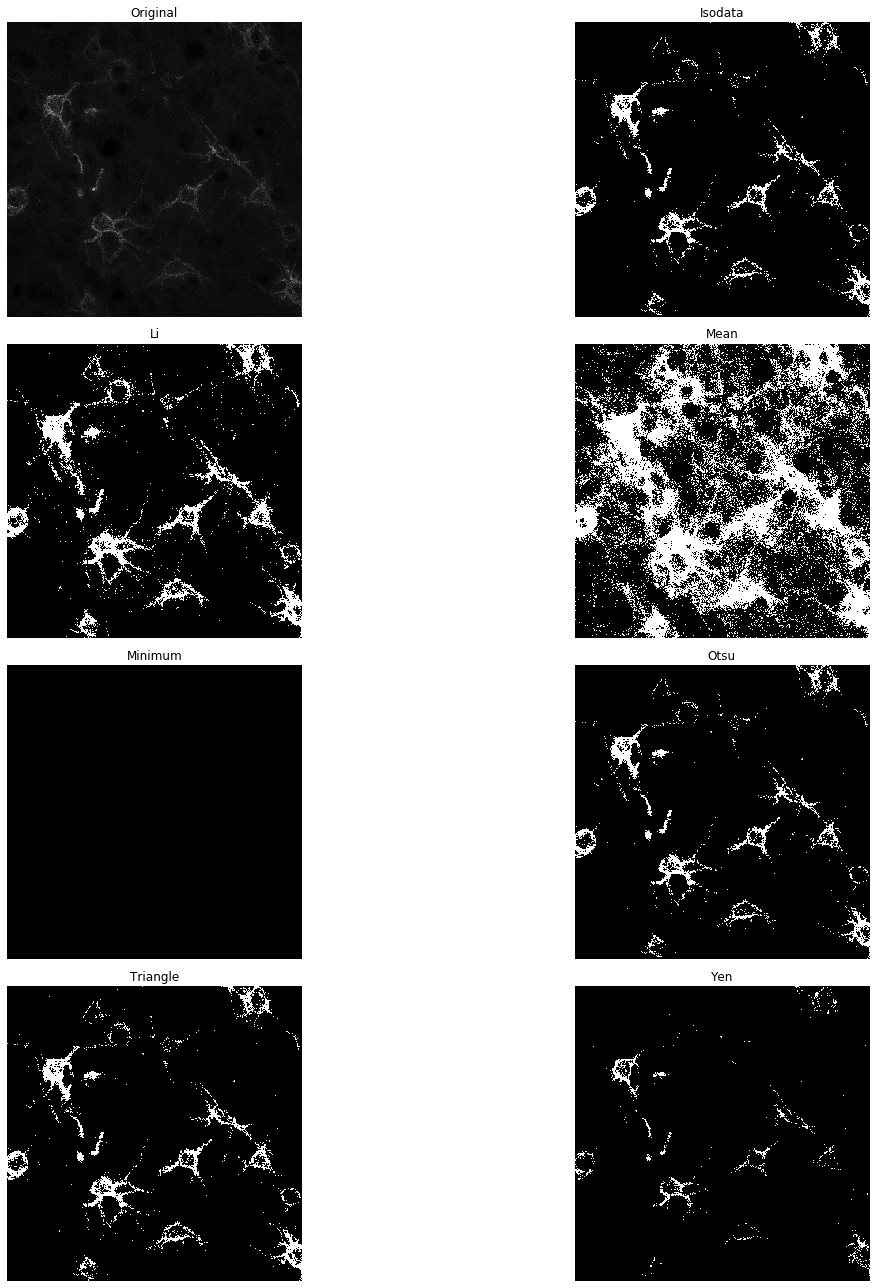

In [34]:
try_all_threshold(PNN_Max, figsize=(20,18))

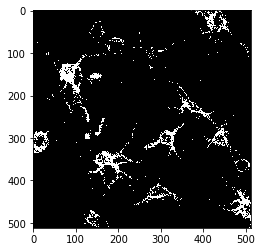

In [35]:
# This performs threshold without using a preprocessing median filtering technique

thresh = skimage.filters.threshold_triangle(PNN_Max)
pnnbinary = PNN_Max > thresh
binaryplot = plt.imshow(pnnbinary, cmap='gray')
plt.show()

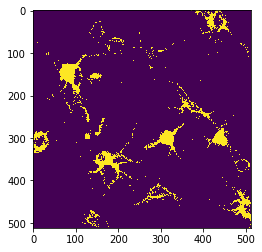

In [47]:
#This fills any holes between the PNNs and removes the background
pnn_filled = ndi.binary_fill_holes(pnnbinary)
plt.imshow(pnn_filled)
plt.show()

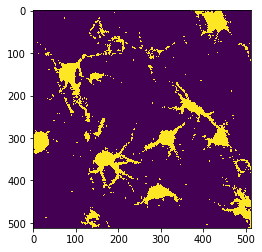

In [48]:
#This dilates the image. The image becomes futher refined without any holes in the PNN
pnn_dilate = skimage.morphology.dilation(pnnbinary)

dilate_hole = ndi.binary_fill_holes(pnn_dilate)


plt.imshow(dilate_hole)
plt.show()

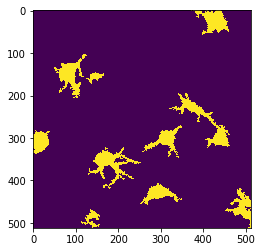

In [49]:
Background_remove = skimage.morphology.remove_small_objects(dilate_hole, min_size = 400)
plt.imshow(Background_remove)
plt.show()

Text(0.5, 1.0, 'Par. Skel. + Clean')

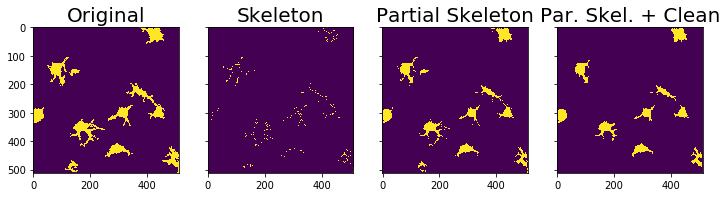

In [50]:
skeleton = skimage.morphology.skeletonize(Background_remove)
partial_skeleton = skimage.morphology.thin(Background_remove, max_iter = 2)

clean_skeleton = skimage.morphology.remove_small_objects(partial_skeleton, min_size = 400)

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (12,12),sharex = True, sharey = True)

ax = axes.ravel()

ax[0].imshow(Background_remove)
ax[0].set_title("Original", fontsize = 20)

ax[1].imshow(skeleton)
ax[1].set_title("Skeleton", fontsize = 20)

ax[2].imshow(partial_skeleton)
ax[2].set_title("Partial Skeleton", fontsize = 20)

ax[3].imshow(clean_skeleton)
ax[3].set_title("Par. Skel. + Clean", fontsize = 20)

#plt.imshow(Background_remove)
#plt.show()

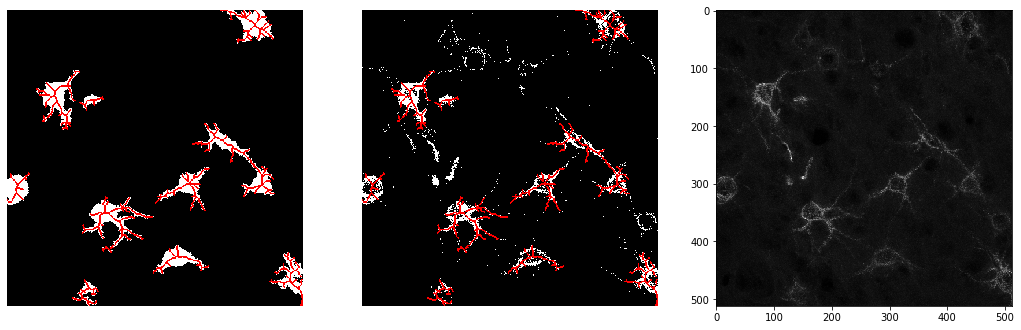

In [51]:
from skan import draw 
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18,18))
ax = axes.ravel()
draw.overlay_skeleton_2d(Background_remove, skeleton, dilate = 1, axes = ax[0])
draw.overlay_skeleton_2d(pnnbinary, skeleton, dilate = 1, axes = ax[1])
ax[2] = plt.imshow(1-PNN_Max, cmap = "Greys")

In [52]:
from skan import csr
from skan import summarize
branch_data = csr.summarise(skeleton)
branch_data

,skeleton-id,node-id-0,node-id-1,branch-distance,branch-type,image-coord-src-0,image-coord-src-1,image-coord-dst-0,image-coord-dst-1,coord-src-0,coord-src-1,coord-dst-0,coord-dst-1,euclidean-distance
0,1,1,23,17.258205,1,0,370,3,386,0.00,370.00,3.250000,386.000000,16.326742
1,1,13,78,18.915059,1,0,429,16,434,0.00,429.00,16.000000,434.250000,16.839314
2,1,15,24,11.255130,1,1,409,11,410,1.00,409.00,11.333333,410.333333,10.419000
3,1,16,25,14.843777,1,1,419,13,413,1.00,419.00,13.000000,413.750000,13.098187
4,1,23,24,28.170190,2,3,386,11,410,3.25,386.00,11.333333,410.333333,25.640815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,10,664,667,6.926775,2,500,136,505,140,500.00,136.75,505.000000,140.800000,6.434477
243,10,2492,667,16.856854,1,503,154,505,140,503.00,154.00,505.000000,140.800000,13.350655
244,10,667,2527,6.982493,1,505,140,511,142,505.00,140.80,511.000000,142.000000,6.118823
245,9,2522,668,2.699673,1,510,507,509,509,510.00,507.00,509.666667,509.666667,2.687419


In [53]:
print(max(branch_data["skeleton-id"]))

10


In [54]:
skel_data = ["skeleton-id","# of branches","tot. branch length","avg. branch length"]
output_data = pd.DataFrame(columns = skel_data)

In [55]:
num_skel = max(branch_data["skeleton-id"])
tot_branch = len(branch_data)
for skels in range(1,num_skel+1):
    num_branch = 0
    tot_length = 0 
    for branch in range(0,tot_branch):
        if branch_data["skeleton-id"][branch] == skels:
            num_branch = num_branch+1
            tot_length = tot_length + branch_data["branch-distance"][branch]
    avg_length = tot_length/num_branch
    output_data.loc[skels] = [skels, num_branch, tot_length, avg_length]

In [58]:
output_data
output_data.to_csv("slide_9_slice_2_60x_z_stack_2.csv",index = False, header = True)

Text(0.5, 1.0, 'Skeleton')

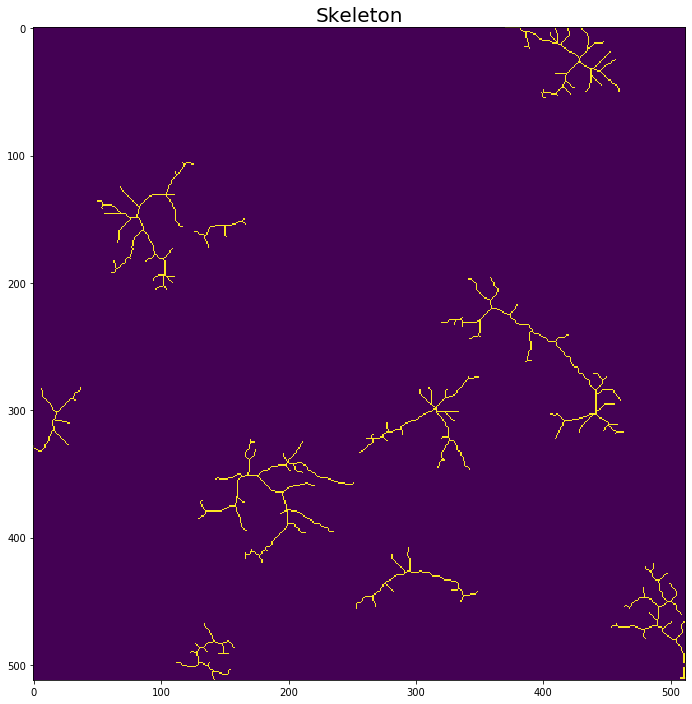

In [57]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12,12),sharex = True, sharey = True)

axes.imshow(skeleton)
axes.set_title("Skeleton", fontsize = 20)

In [ ]:
PNNs, PNNlabels = ndi.label(Background_remove)
PNNs1, PNNlabels1 = ndi.label(skeleton)
PNNs2, PNNlabels2 = ndi.label(partial_skeleton)
PNNs3, PNNlabels3 = ndi.label(clean_skeleton)

In [ ]:
plt.imshow(clean_skeleton)
plt.scatter(425,25, color='r')
plt.show()

In [ ]:
regionprops_original = measure.regionprops(PNNs)
regionprops_skeleton = measure.regionprops(PNNs1)
regionprops_partial_skeleton = measure.regionprops(PNNs2)
regionprops_clean_skeleton = measure.regionprops(PNNs3)

In [ ]:
print(len(regionprops_original))
print(len(regionprops_skeleton))
print(len(regionprops_partial_skeleton))
print(len(regionprops_clean_skeleton))

In [ ]:
print(regionprops_original[0].centroid)